No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Loading records for partition: iid
Loading records for partition: dir50
Loaded 0 records for partition iid
Loaded 0 records for partition dir50


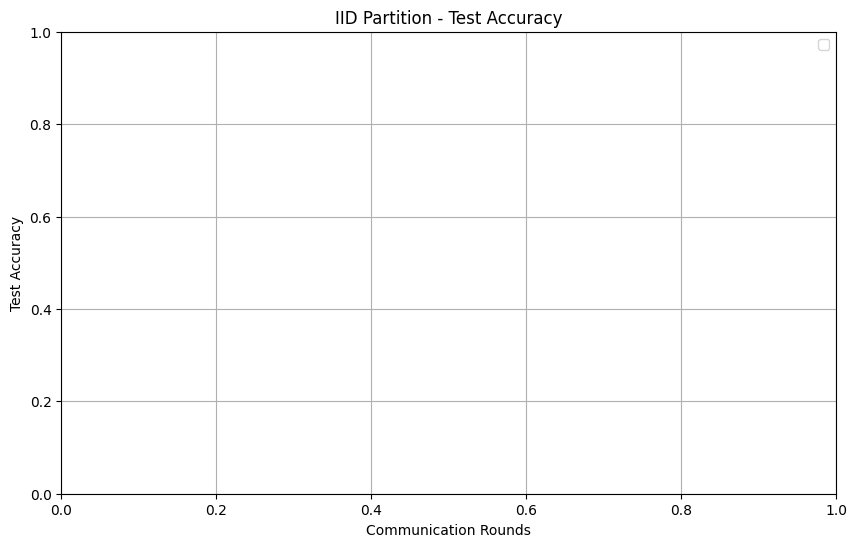

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


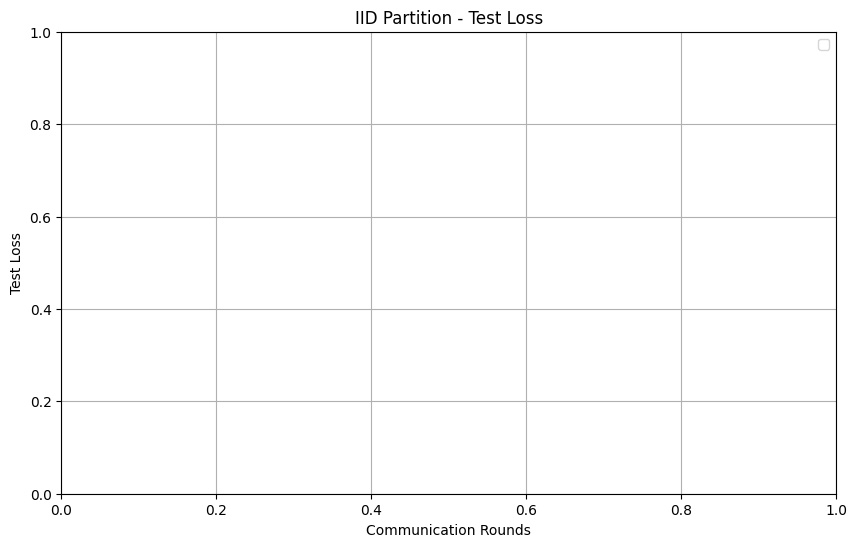

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


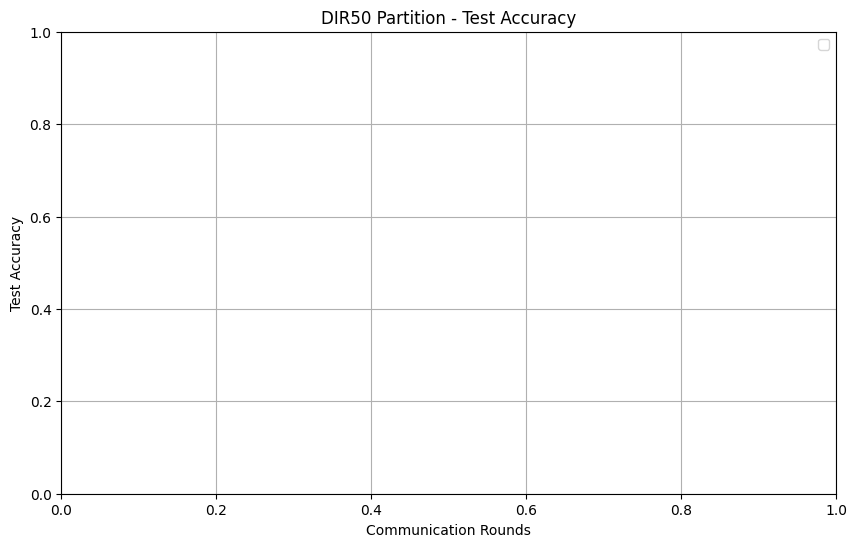

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


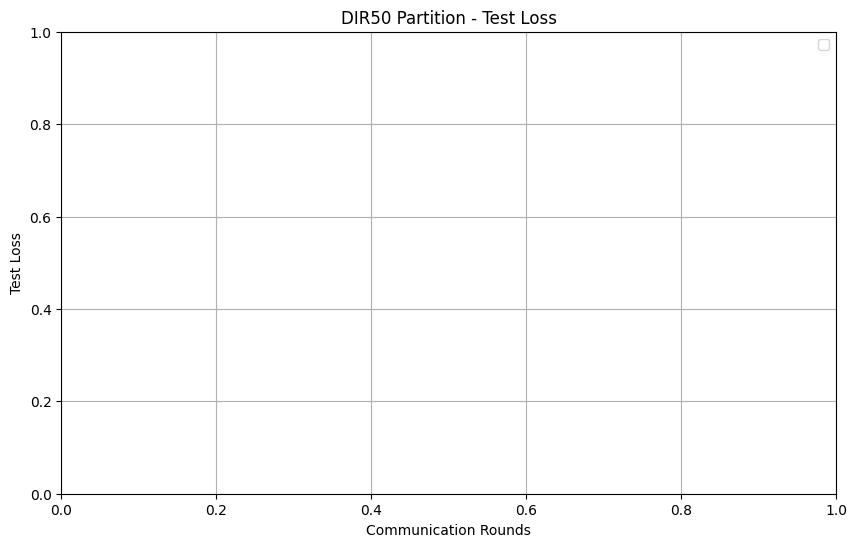

In [2]:
import matplotlib.pyplot as plt
import os
import flgo.experiment.analyzer as fea

# 基本路径
BASE_PATH = '../tasks/10.3/v2_hypermeters_time0.1'

# 数据划分
partitions = ['iid', 'dir50']

# 读取实验记录
records = {}
for partition in partitions:
    task_path = os.path.join(BASE_PATH, partition)
    print(f"Loading records for partition: {partition}")
    
    partition_records = fea.load_records(
        task=task_path,
        algorithm='V2',  # 使用算法名称作为字符串
    )
    records[partition] = partition_records

# 检查是否成功加载记录
for partition, rec in records.items():
    print(f"Loaded {len(rec)} records for partition {partition}")

weight_combinations = [
    [0.1, 0.1, 0.7, 0.1],  # Highest time decay weight
    [0.15, 0.15, 0.5, 0.2],  # High time decay weight
    [0.2, 0.2, 0.4, 0.2],  # Medium time decay weight
    [0.25, 0.25, 0.3, 0.2],  # Low time decay weight
    [0.3, 0.3, 0.2, 0.2],  # Lowest time decay weight
]

labels = [
    'Time decay dominant (0.7)',
    'High time decay weight (0.5)',
    'Balanced, medium time decay (0.4)',
    'Lower time decay weight (0.3)',
    'Minimized time decay (0.2)'
]

colors = ['r', 'g', 'b', 'c', 'm',]

def get_weight_from_record(record):
    """从record中提取权重组合."""
    # 假设权重保存在 record['option']['algo_para'] 中，并且位置 3 到 6 对应权重
    return record.option['algo_para'][3:7]

def plot_results(records, partition, metric):
    """
    records: 该划分下的所有记录
    partition: "iid" or "dir50"
    metric: "test_accuracy" or "test_loss"
    """
    plt.figure(figsize=(10, 6))

    # 对每个实验记录进行绘图
    for record in records:
        # 提取该记录的权重组合
        record_weights = get_weight_from_record(record)
        
        # 找到该权重组合对应的索引
        if record_weights in weight_combinations:
            idx = weight_combinations.index(record_weights)
            label = labels[idx]
            color = colors[idx]
        else:
            print(f"Unrecognized weight combination: {record_weights}")
            continue

        # 绘制该记录的曲线
        plt.plot(
            record.log['communication_round'],  # 横轴：通信轮数
            record.log[metric],  # 纵轴：metric (test_accuracy 或 test_loss)
            label=label,  # 标签
            color=color  # 颜色
        )
    
    plt.title(f'{partition.upper()} Partition - {metric.replace("_", " ").title()}')
    plt.xlabel('Communication Rounds')
    plt.ylabel(metric.replace("_", " ").title())
    plt.legend()
    plt.grid(True)
    plt.show()

# 绘制iid划分下的准确率和损失
plot_results(records['iid'], 'iid', 'test_accuracy')
plot_results(records['iid'], 'iid', 'test_loss')

# 绘制dir50划分下的准确率和损失
plot_results(records['dir50'], 'dir50', 'test_accuracy')
plot_results(records['dir50'], 'dir50', 'test_loss')